In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from neurolib.models.wc import WCModel
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

fs=16
plt.rcParams.update({'font.size': fs})

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

wcdir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/boundaries_WC")
alndir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/boundaries_ALN")

In [3]:
col_lines = "black"
col_font = "gray"
col_points = "darkred"
col_lcbi = "darkblue"

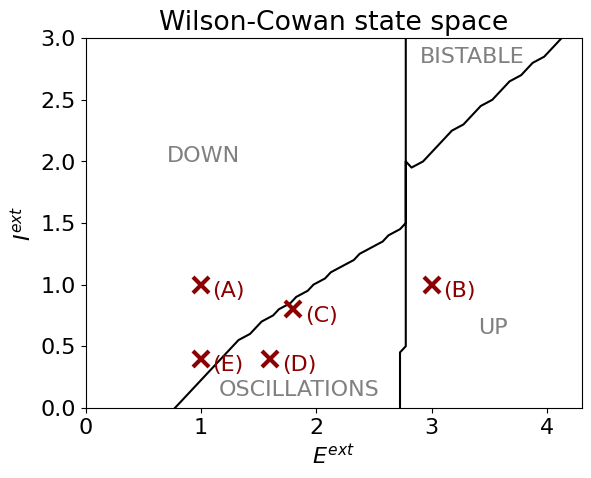

In [8]:
with open(os.path.join(wcdir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(wcdir, 'boundary_osc.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

comp_points = [[1., 1., "(A)"], [3., 1., "(B)"], [1.8, 0.8, "(C)"], [1.6, 0.4, "(D)"], [1., 0.4, "(E)"]]

plt.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
plt.plot(boundary_osc[0][:], boundary_osc[1][:], color=col_lines)

for pind in range(len(comp_points)):
    p=comp_points[pind]
    plt.plot(p[0], p[1], marker="x", markersize=12, color=col_points, markeredgewidth=3, clip_on=False)
    plt.text(p[0]+0.1, p[1]-0.1, p[2], color=col_points, fontsize=fs)
plt.xlabel(r'$E^{ext}$')
plt.ylabel(r'$I^{ext}$')

plt.text(0.7, 2, "DOWN", color=col_font, fontsize=fs)
plt.text(3.4, 0.6, "UP", color=col_font, fontsize=fs)
plt.text(1.15, 0.1, "OSCILLATIONS", color=col_font, fontsize=fs)
plt.text(2.9, 2.8, "BISTABLE", color=col_font, fontsize=fs)

plt.xlim(0.,4.3)
plt.ylim(0,3)

plt.title("Wilson-Cowan state space")
plt.savefig(os.path.join(wcdir, "Fig_2a.jpg"), bbox_inches='tight', dpi=300)


In [5]:
print(len(boundary_osc[0]))

71


In [8]:
print(boundary_oscbi)

[[1.9   1.9   1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075 2.05  2.025
  2.    1.975 1.95  1.925 1.9  ]
 [1.5   1.525 1.55  1.575 1.575 1.6   1.625 1.65  1.65  1.65  1.625 1.625
  1.6   1.575 1.55  1.525 1.5  ]]


NameError: name 'boundary_osc_bi' is not defined

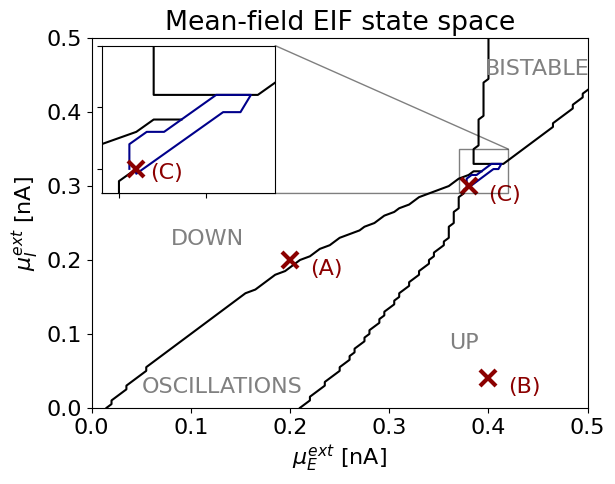

In [26]:
with open(os.path.join(alndir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LC.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LCbi.pickle'), 'rb') as f:
    boundary_oscbi = pickle.load(f)

diff = 0.2 * 0.01

boundary_oscbi[0].append(0.2*(1.9-diff))
boundary_oscbi[1].append(0.2*(1.5))


boundary_bi = np.array(boundary_bi)
#boundary_bi *= 5.0
boundary_osc = np.array(boundary_osc)
#boundary_osc *= 5.0
boundary_oscbi = np.array(boundary_oscbi)
#boundary_oscbi *= 5.0

for k in range(10):
    boundary_oscbi[0][k] -= diff
for k in range(10,17):
    boundary_oscbi[1][k] -= diff

comp_points = [[0.2*1., 0.2*1., "(A)"], [0.2*2.0, 0.2*0.2, "(B)"], [0.2*1.9, 0.2*1.5, "(C)"]]

boundary_osc[0][65] -=0.2*0.035
boundary_osc[0][68] +=diff

fig, ax = plt.subplots()
ax.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
ax.plot(boundary_osc[0][:66], boundary_osc[1][:66], color=col_lines)
ax.plot(boundary_osc[0][69:], boundary_osc[1][69:], color=col_lines)
ax.plot(boundary_oscbi[0][:], boundary_oscbi[1][:], color=col_lcbi)

x1, x2, y1, y2 = 0.2*1.85,0.2* 2.1, 0.2*1.45, 0.2*1.75  # subregion of the original image
axins = ax.inset_axes(
    [0.02, 0.58, 0.35, 0.4],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
axins.plot(boundary_osc[0][:66], boundary_osc[1][:66], color=col_lines)
axins.plot(boundary_osc[0][69:], boundary_osc[1][69:], color=col_lines)
axins.plot(boundary_oscbi[0], boundary_oscbi[1], color=col_lcbi)

p=comp_points[2]
axins.plot(p[0], p[1], marker="x", markersize=12, color=col_points, markeredgewidth=3, clip_on=False)
axins.text(p[0]+0.2*0.02, p[1]-0.2*0.02, p[2], color=col_points, fontsize=fs)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlim(0.,0.2*2.5)
ax.set_ylim(0,0.2*2.5)

for pind in range(len(comp_points)):
    p=comp_points[pind]
    ax.plot(p[0], p[1], marker="x", markersize=12, color=col_points, markeredgewidth=3, clip_on=False)
    ax.text(p[0]+0.2*0.1, p[1]-0.2*0.1, p[2], color=col_points, fontsize=fs)
ax.set_xlabel(r'$\mu_E^{ext}$ [nA]')
ax.set_ylabel(r'$\mu_I^{ext}$ [nA]')

ax.text(0.2*0.4, 0.2*1.1, "DOWN", color=col_font, fontsize=fs)
ax.text(0.2*1.8, 0.2*0.4, "UP", color=col_font, fontsize=fs)
ax.text(0.2*0.25, 0.2*0.1, "OSCILLATIONS", color=col_font, fontsize=fs)
ax.text(0.2*1.98, 0.2*2.25, "BISTABLE", color=col_font, fontsize=fs)

ax.set_title("Mean-field EIF state space")
plt.savefig(os.path.join(alndir, "Fig_2b.jpg"), bbox_inches='tight', dpi=300)

plt.show()

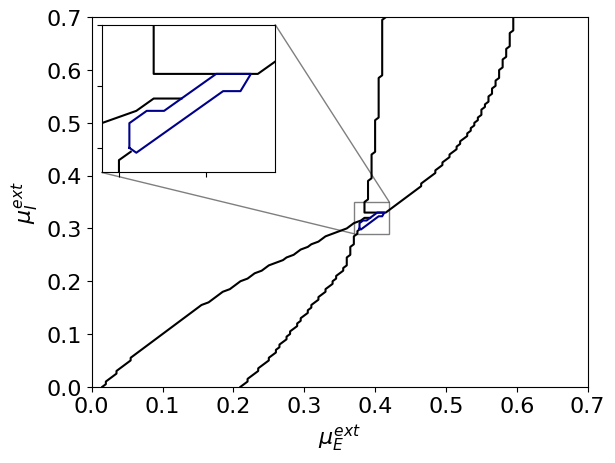

In [37]:
with open(os.path.join(alndir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LC.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LCbi.pickle'), 'rb') as f:
    boundary_oscbi = pickle.load(f)

diff = 0.01

boundary_oscbi[0].append(0.2*(1.9-diff))
boundary_oscbi[1].append(0.2*(1.5))

boundary_bi = np.array(boundary_bi)
boundary_osc = np.array(boundary_osc)
boundary_oscbi = np.array(boundary_oscbi)

for k in range(10):
    boundary_oscbi[0][k] -= 0.2*diff
for k in range(10,17):
    boundary_oscbi[1][k] -= 0.2*diff

boundary_osc[0][65] -=0.2*0.035
boundary_osc[0][69] -=0.2*0.008
boundary_osc[1][69] -=0.2*0.008
    
fig, ax = plt.subplots()
ax.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
ax.plot(boundary_osc[0][:66], boundary_osc[1][:66], color=col_lines)
ax.plot(boundary_osc[0][69:], boundary_osc[1][69:], color=col_lines)
ax.plot(boundary_oscbi[0][:], boundary_oscbi[1][:], color=col_lcbi)

x1, x2, y1, y2 = 0.2*1.85, 0.2*2.1, 0.2*1.45, 0.2*1.75  # subregion of the original image
axins = ax.inset_axes(
    [0.02, 0.58, 0.35, 0.4],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
axins.plot(boundary_osc[0][:66], boundary_osc[1][:66], color=col_lines)
axins.plot(boundary_osc[0][69:], boundary_osc[1][69:], color=col_lines)
axins.plot(boundary_oscbi[0], boundary_oscbi[1], color=col_lcbi)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlim(0.,0.2*3.5)
ax.set_ylim(0,0.2*3.5)

ax.set_xlabel(r'$\mu_E^{ext}$ [nA]')
ax.set_ylabel(r'$\mu_I^{ext}$ [nA]')

plt.savefig("ALN_statespace_box.pdf", bbox_inches='tight')
plt.show()


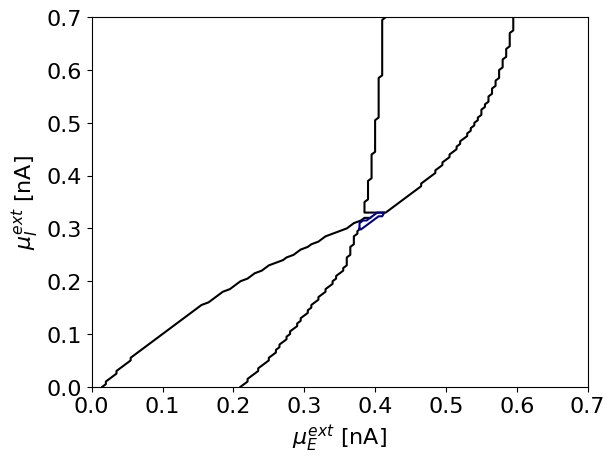

In [38]:
with open(os.path.join(alndir, 'boundary_bi.pickle'), 'rb') as f:
    boundary_bi = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LC.pickle'), 'rb') as f:
    boundary_osc = pickle.load(f)

with open(os.path.join(alndir, 'boundary_LCbi.pickle'), 'rb') as f:
    boundary_oscbi = pickle.load(f)

diff = 0.01

boundary_oscbi[0].append(0.2*(1.9-diff))
boundary_oscbi[1].append(0.2*(1.5))

boundary_bi = np.array(boundary_bi)
boundary_osc = np.array(boundary_osc)
boundary_oscbi = np.array(boundary_oscbi)

for k in range(10):
    boundary_oscbi[0][k] -= 0.2*diff
for k in range(10,17):
    boundary_oscbi[1][k] -= 0.2*diff

boundary_osc[0][65] -=0.2*0.035
boundary_osc[0][69] -=0.2*0.008
boundary_osc[1][69] -=0.2*0.008
    
fig, ax = plt.subplots()
ax.plot(boundary_bi[0], boundary_bi[1], color=col_lines)
ax.plot(boundary_osc[0][:66], boundary_osc[1][:66], color=col_lines)
ax.plot(boundary_osc[0][69:], boundary_osc[1][69:], color=col_lines)
ax.plot(boundary_oscbi[0][:], boundary_oscbi[1][:], color=col_lcbi)

ax.set_xlim(0.,0.2*3.5)
ax.set_ylim(0,0.2*3.5)

ax.set_xlabel(r'$\mu_E^{ext}$ [nA]')
ax.set_ylabel(r'$\mu_I^{ext}$ [nA]')

plt.savefig("ALN_statespace.pdf", bbox_inches='tight')
plt.show()

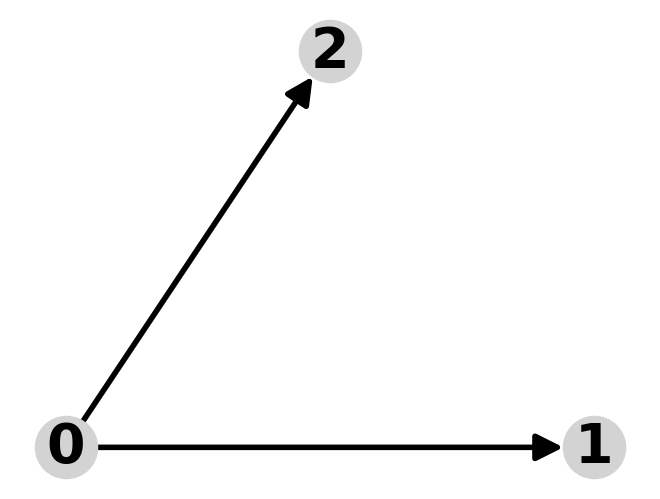

In [100]:
import networkx as nx

options = {
    'node_color': 'lightgray',
    'node_size': 2000,
    'width': 4,
    'arrowstyle': '-|>',
    'arrowsize': 40,
    'font_size' : 40,
    'font_weight' : 'bold',
    }

cmat = np.array( [[0., 0., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1

N = cmat.shape[0]
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

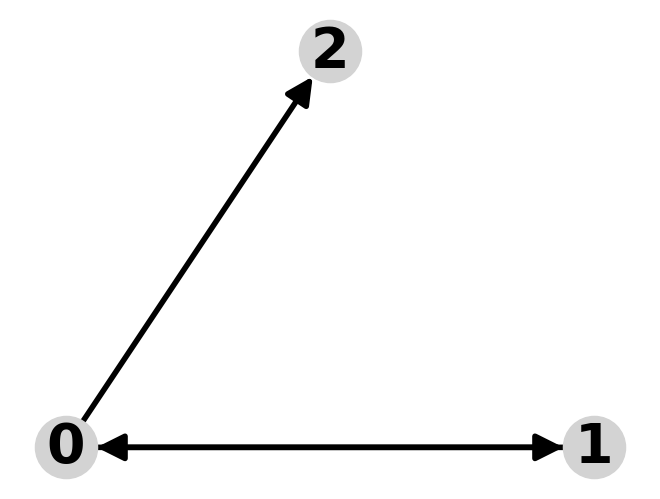

In [101]:
cmat = np.array( [[0., 1., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

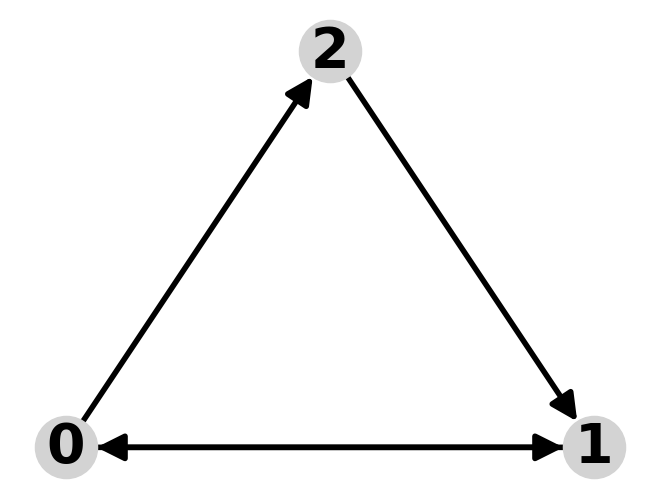

In [102]:

cmat = np.array( [[0., 1., 0.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()


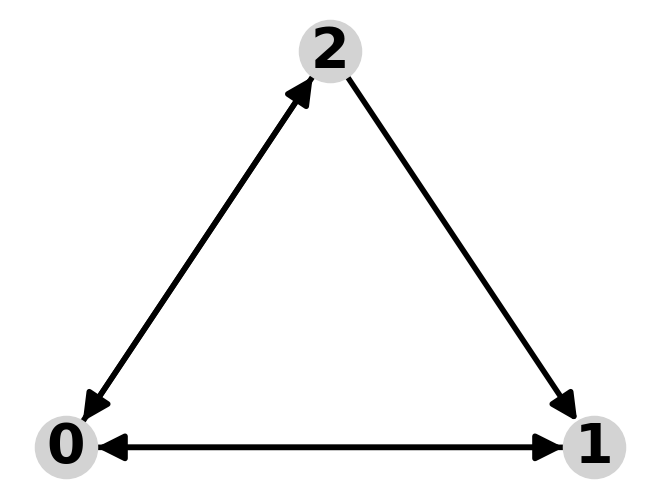

In [103]:

cmat = np.array( [[0., 1., 1.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()